<a href="https://colab.research.google.com/github/Aicoaching2025/Candace/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()
!pip install -U scikit-learn
import pandas as pd

df = pd.read_csv("Admission_Predict.csv")
df.columns = df.columns.str.replace(' ', '_').str.lower()
print(df.head(5))

Saving Admission_Predict.csv to Admission_Predict (2).csv
   serial_no.  gre_score  toefl_score  university_rating  sop  lor_  cgpa  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   research  chance_of_admit_  
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [8]:
#Create a binary class (1=admission likely , 0=admission unlikely) from the chance of admit – greater than 80%
X = df.loc[:, 'gre_score':'research']
y = df['chance_of_admit_']>=.8

In [17]:

from sklearn.model_selection import train_test_split # Import the train_test_split function
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text #Import the DecisionTreeClassifier

#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # Fix the order of variables

#Create a Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.1, criterion='gini')

#Train the model
dt.fit(x_train, y_train)

#Predict the test set
y_pred = dt.predict(x_test)

#Evaluate the model
print(dt.score(x_test, y_test))



0.925


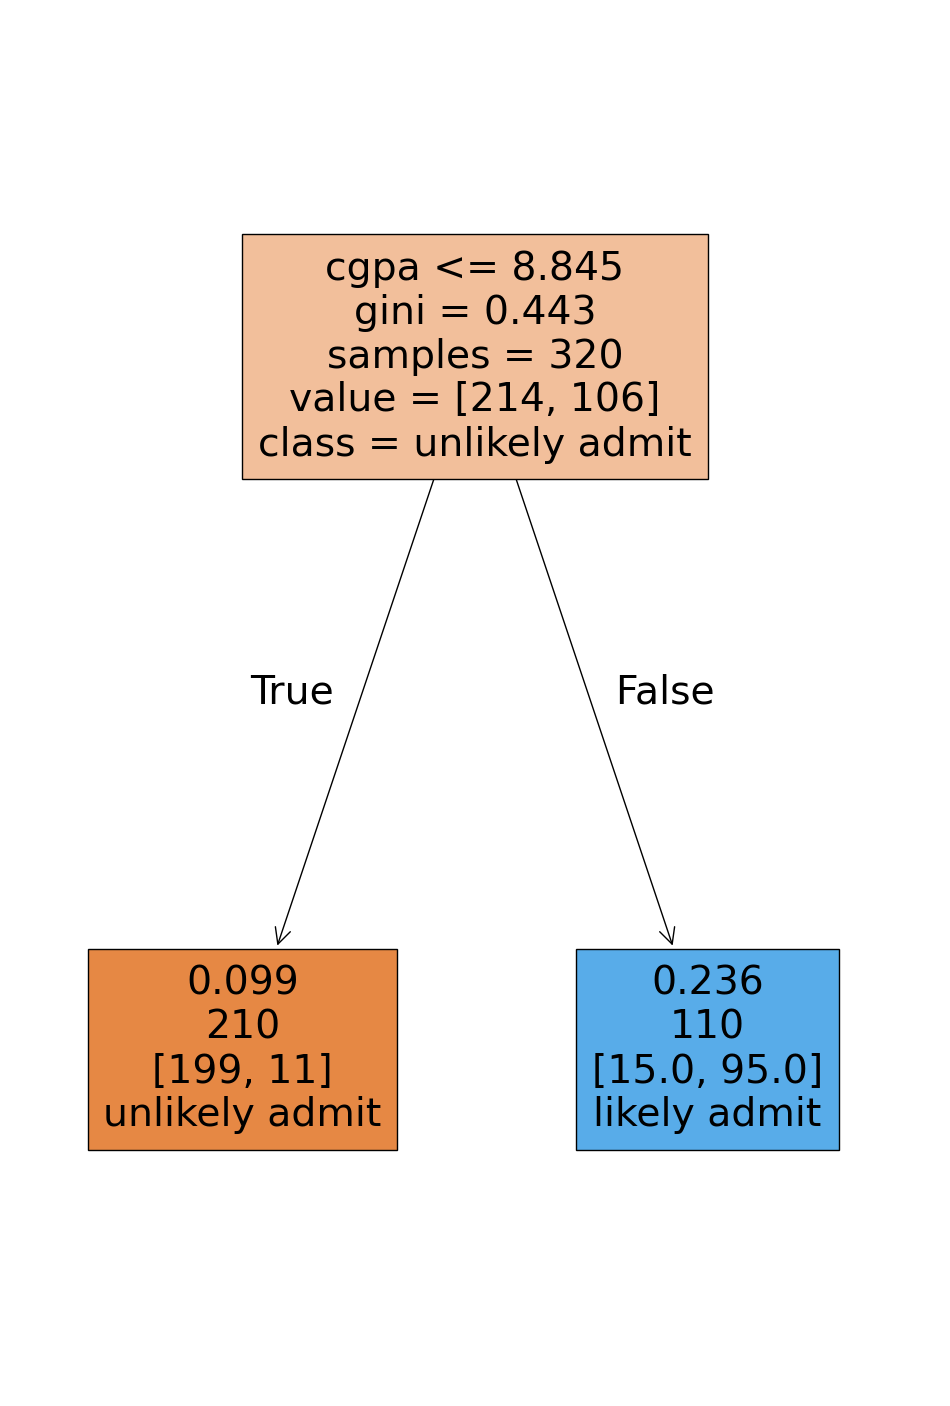

In [27]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Visualize the tree
plt.figure(figsize=(10, 10))

plot_tree(dt, feature_names=x_train.columns, max_depth=3, class_names=['unlikely admit', 'likely admit'], label='root', filled=True,)
plt.show()

In [28]:
def gini(data):
    """Calculate the Gini Impurity Score
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)

gi = gini(y_train)
print(f'Gini impurity at root: {round(gi,3)}')


Gini impurity at root: 0.443


In [29]:
def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)


In [30]:
info_gain_list = []
for i in x_train.cgpa.unique():
    left = y_train[x_train.cgpa<=i]
    right = y_train[x_train.cgpa>i]
    info_gain_list.append([i, info_gain(left, right, gi)])

ig_table = pd.DataFrame(info_gain_list, columns=['split_value', 'info_gain']).sort_values('info_gain',ascending=False)
ig_table.head(10)

,split_value,info_gain
10,8.84,0.296932
124,8.85,0.291464
139,8.88,0.290704
18,8.90,0.290054
98,8.83,0.287810
110,8.87,0.286050
152,8.94,0.284714
57,8.96,0.284210
96,8.80,0.283371
21,9.00,0.283364


Text(0, 0.5, 'info gain')

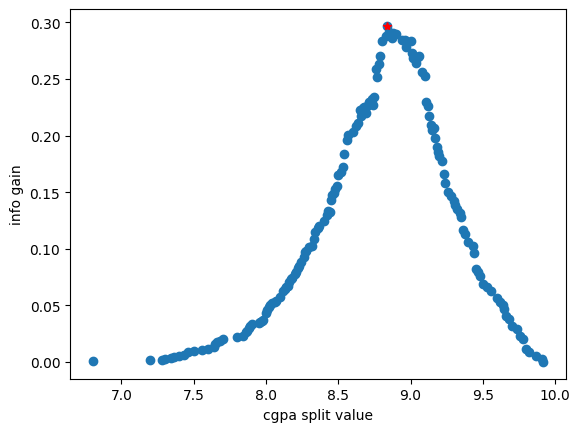

In [31]:
plt.plot(ig_table['split_value'], ig_table['info_gain'],'o')
plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')
